In [11]:
from Bio import SeqIO
te_fasta = "../data/benchmarking/temp_te.fasta"
tr_fasta = "../data/benchmarking/temp_tr.fasta"
# read the sequences from the fasta file
sequences = SeqIO.parse(te_fasta, "fasta")
tr_sequences = list(SeqIO.parse(tr_fasta, "fasta"))
# for each sequence, write it to a new file
for seq in sequences:
    print(seq)
    filename = f"../data/benchmarking/temp_{seq.id.replace('/', '_')}.fasta"
    with open(filename, "w+") as f:
        SeqIO.write(tr_sequences, f, "fasta")     
        SeqIO.write(seq, f, "fasta")


ID: A0A173WNX1.1/179-193
Name: A0A173WNX1.1/179-193
Description: A0A173WNX1.1/179-193 [subseq from] A0A173WNX1_9BACE IPT/TIG domain {ECO:0000313|EMBL:CUN40187.1}
Number of features: 0
Seq('EaVTPRNWVSGNVVI')
ID: A0A173WNX1.1/233-248
Name: A0A173WNX1.1/233-248
Description: A0A173WNX1.1/233-248 [subseq from] A0A173WNX1_9BACE IPT/TIG domain {ECO:0000313|EMBL:CUN40187.1}
Number of features: 0
Seq('SWKNGEwWTPADWIQN')
ID: N1JCS9.1/597-618
Name: N1JCS9.1/597-618
Description: N1JCS9.1/597-618 [subseq from] N1JCS9_BLUG1 Putative peregrin/putative PHD finger-containing protein 3 {ECO:0000313|EMBL:CCU80379.1}
Number of features: 0
Seq('CPADWIRENDVITATRDARAFY')
ID: H5WN51.1/326-341
Name: H5WN51.1/326-341
Description: H5WN51.1/326-341 [subseq from] H5WN51_9BURK Histidine kinase {ECO:0000256|ARBA:ARBA00012438}
Number of features: 0
Seq('QVLTPMGWAPGTNVMA')
ID: Q21XJ3.1/106-173
Name: Q21XJ3.1/106-173
Description: Q21XJ3.1/106-173 [subseq from] Q21XJ3_RHOFT Thiosulphate-binding protein {ECO:0000313|EMBL

In [19]:
list(sequences)

[]

In [8]:
import pandas as pd

# Define the file path
file_path = "../data/benchmarking/temp_alipid.txt"


# Load the file into a DataFrame
df = pd.read_csv(file_path, sep="\s+", usecols=[0, 1, 2], names = ["seq1","seq2","pid"],header=0)

# Print the DataFrame
print(df)

                 seq1                  seq2    pid
0    Q6FXS9.1/208-244      Q6CEJ7.1/158-193  33.33
1    Q6FXS9.1/208-244      B1N5A8.1/197-231  37.14
2    Q6FXS9.1/208-244      Q7M8C0.1/191-222  25.00
3    Q6FXS9.1/208-244      P21762.3/158-192  25.71
4    Q6FXS9.1/208-244      D6XKT6.1/191-224  35.29
..                ...                   ...    ...
115  O66779.1/178-205      O83522.1/157-179  39.13
116  O66779.1/178-205  A0A173WNX1.1/179-193  20.00
117  P0AE08.2/155-182      O83522.1/157-179  60.87
118  P0AE08.2/155-182  A0A173WNX1.1/179-193  33.33
119  O83522.1/157-179  A0A173WNX1.1/179-193  26.67

[120 rows x 3 columns]


In [13]:
seq.id = "A0A173WNX1.1/179-193"

In [16]:
# Assume seq.id is a variable holding the sequence id
seq.id = "A0A173WNX1.1/179-193"

# Subset the DataFrame
subset_df = df[(df['seq1'] == seq.id) | (df['seq2'] == seq.id)]

# Return the maximum id_percentage
max_pid = subset_df['pid'].max()

print(max_pid)

46.67


In [18]:
import glob
import os
save_path = "/n/eddy_lab/Lab/protein_annotation_dl/PSALM/data/benchmarking"
# Remove tmp files from save_path
tmp_files = glob.glob(f"{save_path}/tmp*")
for file in tmp_files:
    os.remove(file)

In [44]:
import pandas as pd
df = pd.read_csv("../data/benchmarking/log.csv",header=None, names=["subseq_id","family","pid"])
df['seq_id'] = df['subseq_id'].str.split('/').str[0]


Subset dataframe to get seq_ids that have no subseq_id with a pid greater than 25

In [37]:
grouped_df = df.groupby('seq_id')['pid'].max()
filtered_df = grouped_df[grouped_df < 25]
print(filtered_df)


seq_id
A0A010QQ35.1    19.61
A0A010RJF2.1    20.16
A0A010RQ92.1    24.44
A0A011MA56.1    23.22
A0A011Q2R1.1    17.69
                ...  
Z4WUN1.1        22.12
Z4WW19.1        24.32
Z4YIK0.1        13.58
Z9JVF0.1        23.42
Z9JWP2.1        21.70
Name: pid, Length: 66758, dtype: float64


In [42]:
# Write all sequence ids to a file
filtered_df.to_csv('../data/benchmarking/seq_ids.csv', header=False, sep='\t')


<Axes: >

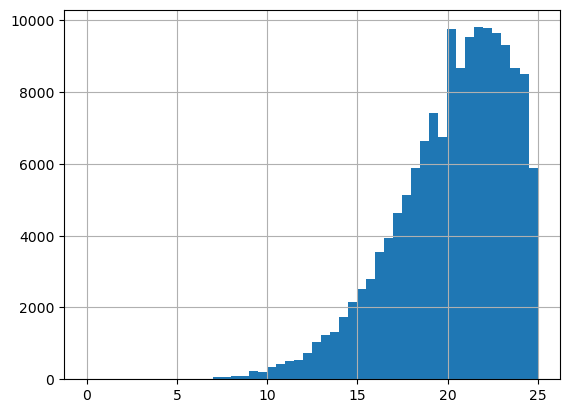

In [33]:
filtered_df.hist(bins=50)


Subset df by domain

In [45]:
grouped_df = df.groupby('family')['pid'].max()
# filtered_df = grouped_df[grouped_df < 25]
# print(filtered_df)

In [46]:
# Convert the Series to DataFrame
grouped_df = grouped_df.to_frame()

# Add a new row
grouped_df.loc['IDR'] = [0]


In [6]:
grouped_df.mean()

54.41161724327292

array([[<Axes: title={'center': 'pid'}>]], dtype=object)

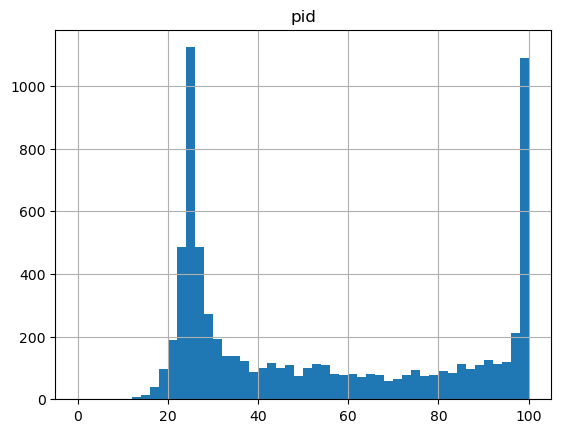

In [48]:
grouped_df.hist(bins=50)

In [49]:
# Write all sequence ids to a file
grouped_df.to_csv('../data/benchmarking/old_test_max_pid.csv', header=True, sep='\t')

In [47]:
grouped_df

,pid
family,
PF00001.24,92.74
PF00002.27,100.00
PF00003.25,99.21
PF00004.32,100.00
PF00005.30,99.31
...,...
PF20599.1,27.27
PF20609.1,23.81
PF20611.1,25.00


In [13]:
grouped_df["PF06050.16"]

76.45

In [15]:
grouped_df = pd.read_csv('../data/benchmarking/old_test_max_pid.csv', sep='\t', header=0)

In [37]:
print(f"{grouped_df.loc[grouped_df['family'] == 'PF13160.9', 'pid'].values[0]}")



26.23


In [23]:
test

In [32]:
len(grouped_df)

7284

In [38]:
pid_csv = "old_test_max_pid.csv"
df = pd.read_csv(f"../data/benchmarking/{pid_csv}",header=0, sep='\t')

In [40]:
entry = "PF20620.1"
label=f"{entry}: {df.loc[df['family'] == str(entry), 'pid'].values[0]}%"

In [41]:
label

'PF20620.1: 48.91%'

In [54]:
sub_df = df.groupby('seq_id').to_frame()


AttributeError: 'DataFrameGroupBy' object has no attribute 'to_frame'

In [55]:
df

,subseq_id,family,pid,seq_id
0,A0A0R4IW83.1/127-157,PF00008.30,65.52,A0A0R4IW83.1
1,A0A0R4IW83.1/241-270,PF00008.30,83.33,A0A0R4IW83.1
2,A0A0R4IW83.1/365-393,PF00008.30,93.10,A0A0R4IW83.1
3,A0A0R4IW83.1/403-431,PF00008.30,93.10,A0A0R4IW83.1
4,A0A212F7S7.1/368-397,PF00008.30,63.33,A0A212F7S7.1
...,...,...,...,...
306009,A0A4Q2T2V1.1/39-206,PF20611.1,22.22,A0A4Q2T2V1.1
306010,A0A5B1M1N1.1/39-182,PF20611.1,25.00,A0A5B1M1N1.1
306011,Q8P854.1/656-784,PF20620.1,34.88,Q8P854.1
306012,Q9A5A2.1/659-781,PF20620.1,33.33,Q9A5A2.1


In [58]:
# Assuming df is your DataFrame
grouped = df.groupby(['seq_id', 'family'])['pid'].max().reset_index()

result = {
    name: group[['family', 'pid']].set_index('family')['pid'].to_dict()
    for name, group in grouped.groupby('seq_id')
}


In [65]:
# Iterate over the dictionary
for seq_id in result.keys():
    # Add the family, pid pair to the dictionary
    result[seq_id]["IDR"] = 0.0


In [67]:
import pickle

with open('../data/benchmarking/old_test_pids.pkl', 'wb') as f:
    pickle.dump(result, f)


In [66]:
result['A0A173WNX1.1']

{'PF01833.27': 31.43, 'PF16405.8': 19.72, 'IDR': 0.0}